<a href="https://colab.research.google.com/github/sabhashanki/Fraudulent_Transaction/blob/main/Fraud_Detection_Insaid_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Fraudulent Transaction Prediction**

### **Abstract**

##### Worldwide financial losses caused by credit card fraudulent activities are worth tens of billions of dollars. There exists a wide variety of scenarios that may lead a fraudster to successfully perform fraudulent payments with a credit card. As technology evolves, both in terms of fraud prevention and ease of use of payment systems, so do fraudster techniques. They adapt by moving from the old (and by now fixed) targets to the vulnerability of the new technologies. They also benefit from the constant changes in volume and characteristics of genuine transactions.


#####It is useful to distinguish two transaction scenarios. The first, called card-present (CP) scenarios, refer to scenarios where a physical card is needed, such as transactions at a store (also referred to as a point-of-sale - POS) or transactions at a cashpoint (for instance at an automated teller machine - ATM). The second, called card-not-present (CNP) scenarios, refers to scenarios where a physical card does not need to be used, which encompasses payments performed on the Internet, by phone, or by mail.

#####Card-present frauds occur when a fraudster manages to make a successful fraudulent transaction using a physical payment card, either at an ATM or a POS. In this setting, fraud scenarios are usually categorized as lost or stolen cards, counterfeited cards, and card not received.

#####Card-not-present refers to the general category of frauds conducted remotely, either by mail, phone, or on the Internet, using only some of the information present on a card. The data that is generally involved in card-not-present fraud involves the card number, card expiration date, card security code, and personal billing information (such as the cardholder’s address).

####**Machine learning for credit card fraud detection**

#####Credit card fraud detection (CCFD) is like looking for needles in a haystack. It requires finding, out of millions of daily transactions, which ones are fraudulent. Due to the ever-increasing amount of data, it is now almost impossible for a human specialist to detect meaningful patterns from transaction data. For this reason, the use of machine learning techniques is now widespread in the field of fraud detection, where information extraction from large datasets is required

In [98]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
import logging
import warnings
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import plotly.express as px


In [99]:
# importing 450MB dataset directly into pandas dataframe
dff = pd.read_csv('https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV')

In [100]:
df = dff.copy()

In [101]:
# Datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [102]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Data Cleaning

In [103]:
# Handling missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values found.

In [104]:
# Renaming column names for convenience
df.columns = ['Transaction_Hours','Type','Transaction_Amt','Sender','Sender_Bal_b4','Sender_Bal_After','Receiver','Receiver_Bal_b4','Receiver_Bal_After','isFraud','isFlaggedFraud']


In [105]:
# Features with numerical value
features = ['Transaction_Amt','Sender_Bal_b4', 'Transaction_Hours','Sender_Bal_After','Receiver_Bal_b4','Receiver_Bal_After']

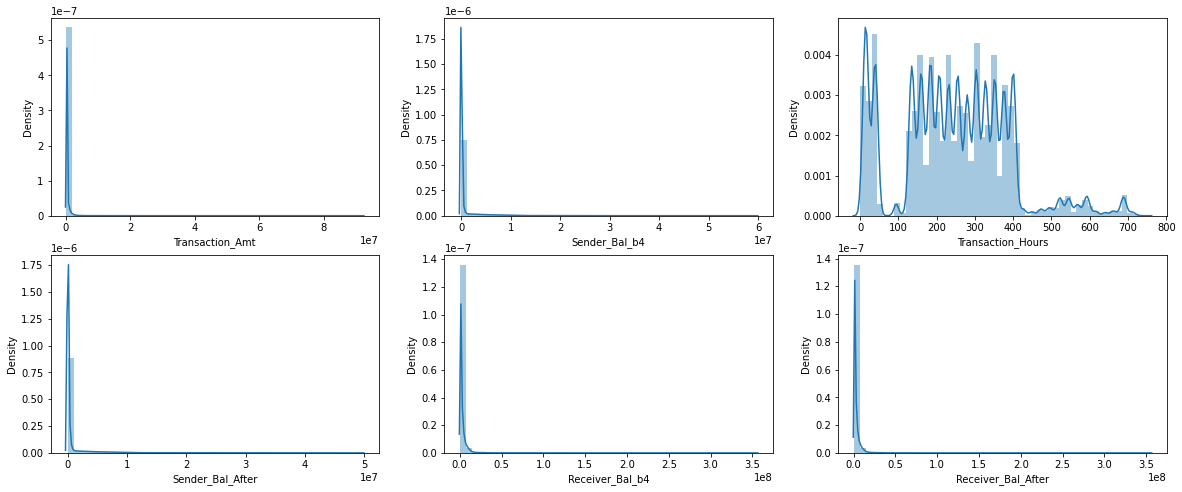

In [106]:
# Plotting all numerical features for distrubution check
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(df[feature])
plt.show()


*   All features except 'Transaction_Hours' have right skewed distribution
*   Skewed data - When a distribution is skewed it means data is asymmetrucally distributed and indicates the presence of outliers
*   The direction of skewness shows the directon of the outliers either in postive or negative end.
*   It can be rectified by removing outliers, normalizing or transforming the data using log, boxcox or polynomial transformation









---



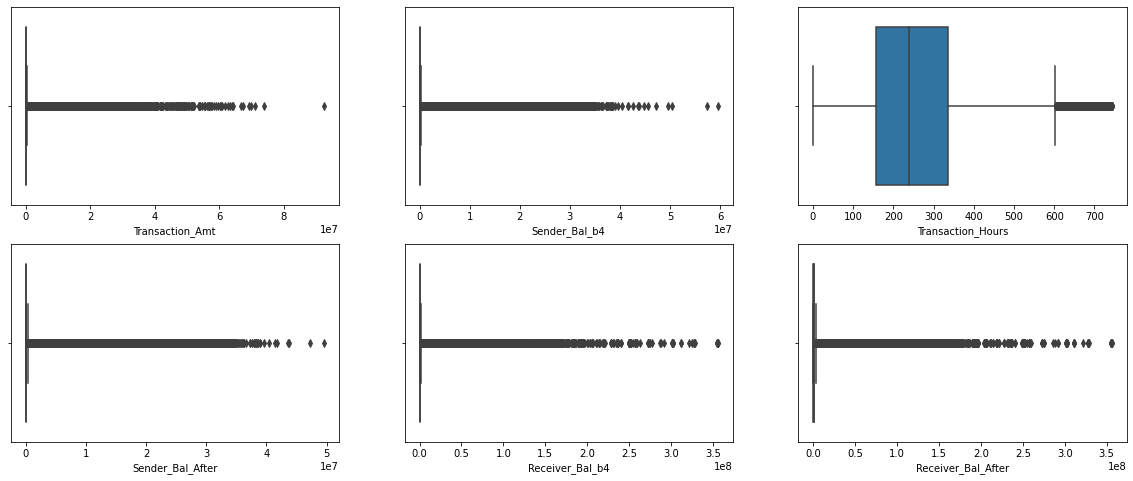

In [107]:
# Plotting boxplot to find the outliers
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.boxplot(df[feature])
plt.show()

Boxplot shows the 0th, 25th, 75th, 100th percentile of the distributed data and the presence of outlier. In our dataset all features has outliers which has to be removed using Inter-Quartile Range (IQR) proximity rule or Percentile-based approach in calculating upper and lower limit of the distribution. Values beyond these limits are considered as Outliers.

##### **Handling Outliers**

In [108]:
# Removing outliers using Inter-Quartile Range (IQR) proximity rule  

for feature in features:
  percentile25 = df[feature].quantile(0.25)
  percentile75 = df[feature].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].shape
  df = df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]
  print(f'\nRemoving outliers from {feature} \n   Outliers : {outliers}\n   Remaining samples :', df.shape)



Removing outliers from Transaction_Amt 
   Outliers : (338078, 11)
   Remaining samples : (6024542, 11)

Removing outliers from Sender_Bal_b4 
   Outliers : (1061163, 11)
   Remaining samples : (4963379, 11)

Removing outliers from Transaction_Hours 
   Outliers : (80311, 11)
   Remaining samples : (4883068, 11)

Removing outliers from Sender_Bal_After 
   Outliers : (910194, 11)
   Remaining samples : (3972874, 11)

Removing outliers from Receiver_Bal_b4 
   Outliers : (525926, 11)
   Remaining samples : (3446948, 11)

Removing outliers from Receiver_Bal_After 
   Outliers : (247545, 11)
   Remaining samples : (3199403, 11)


After removing outliers the samples reduced from 6362620 to 3199403. Nearly 50% outlier samples are removed using IQR rule.

In [109]:
# Correlation between features and target 
df.corr()

,Transaction_Hours,Transaction_Amt,Sender_Bal_b4,Sender_Bal_After,Receiver_Bal_b4,Receiver_Bal_After,isFraud,isFlaggedFraud
Transaction_Hours,1.000000,-0.016607,-0.000292,-0.000669,-0.011022,-0.019198,0.010484,NaN
Transaction_Amt,-0.016607,1.000000,0.222107,-0.242888,0.391901,0.652027,0.006590,NaN
Sender_Bal_b4,-0.000292,0.222107,1.000000,0.401685,-0.027144,0.052903,0.080537,NaN
Sender_Bal_After,-0.000669,-0.242888,0.401685,1.000000,-0.142855,-0.199941,-0.011241,NaN
Receiver_Bal_b4,-0.011022,0.391901,-0.027144,-0.142855,1.000000,0.938201,-0.006116,NaN
Receiver_Bal_After,-0.019198,0.652027,0.052903,-0.199941,0.938201,1.000000,-0.007143,NaN
isFraud,0.010484,0.006590,0.080537,-0.011241,-0.006116,-0.007143,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


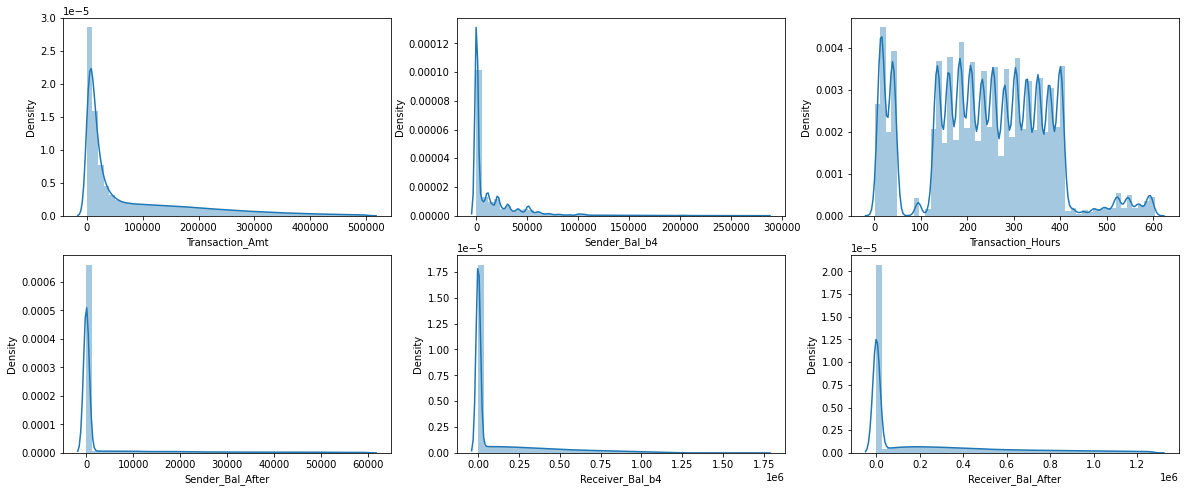

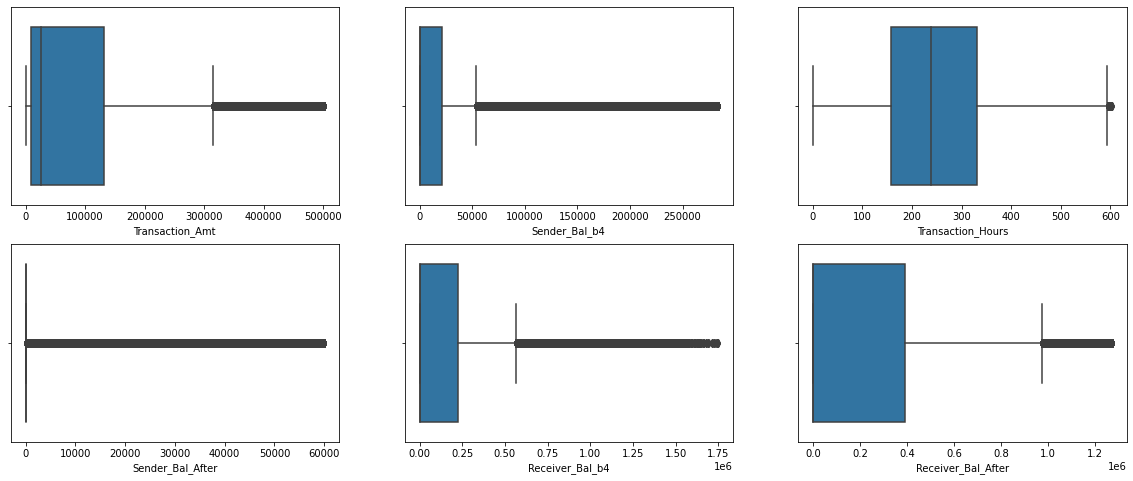

In [110]:
# Plotting after removing outliers

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(df[feature])
plt.show()

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.boxplot(df[feature])
plt.show()

### **Exploratory Data Analysis**

In [111]:
df.head()

,Transaction_Hours,Type,Transaction_Amt,Sender,Sender_Bal_b4,Sender_Bal_After,Receiver,Receiver_Bal_b4,Receiver_Bal_After,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


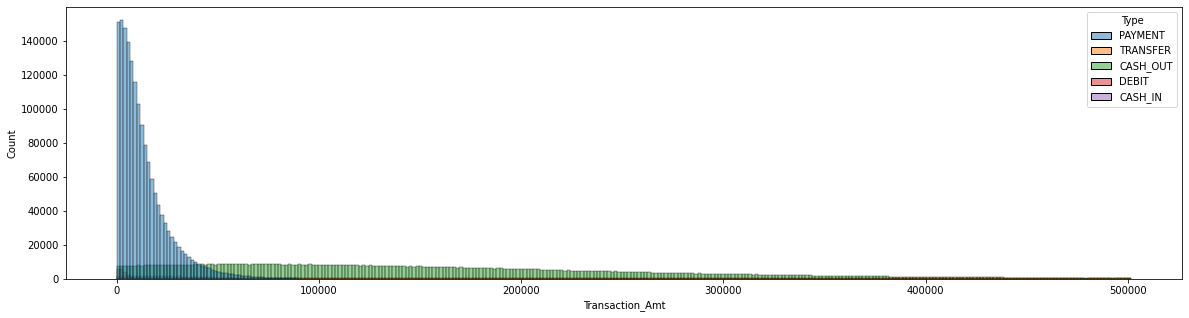

In [112]:
plt.figure(figsize=(20,5))
warnings.filterwarnings('ignore')
sns.histplot(df, x='Transaction_Amt', hue = 'Type')

plt.show()

Most of the transactions are third party payments means money has been used to purchase or pay bills to the merchants like electricity, mobile recharge, onlin e shopping, online food delivery etc. Second most mode of usage is cash_out - withdrawing money from ATMs which is untraceable if there is no CCTV.

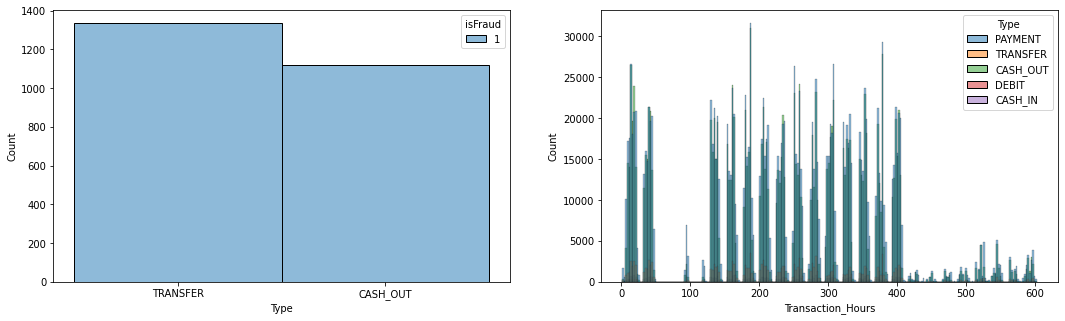

In [113]:
plt.figure(figsize=(18,5))
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.histplot(df[df.isFraud == 1], x="Type", hue = 'isFraud')

plt.subplot(1,2,2)
sns.histplot(df, x = 'Transaction_Hours', hue = 'Type')
plt.show()

Most of the fraud transactions are transfer and cashout, means it can be untraceable when executed cleverly. Also the transaction time for cash_mode transactions are longer compared to transfer mode.

In [114]:
df2 = df.copy()

In [115]:
df2['Receiver_Status'] = df2['Receiver'].apply(lambda x : 'Unknown Receiver' if x[0] == 'M' else 'Known Receiver')

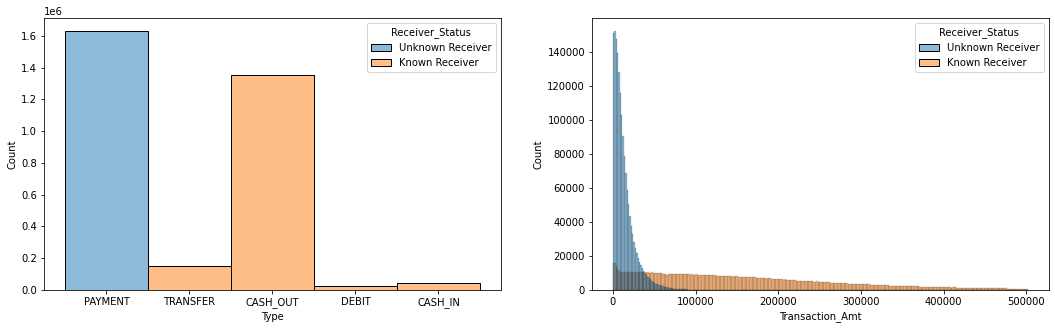

In [116]:
plt.figure(figsize=(18,5))
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.histplot(df2, x="Type", hue = 'Receiver_Status')

plt.subplot(1,2,2)
sns.histplot(df2, x = 'Transaction_Amt', hue = 'Receiver_Status')

plt.show()

Payment mode of transfer are mostly to unknown sender and remaining all transactions are to known sender whose bank details are traceable. 

Transactions to unknown sender are very high when compared to known which makes it difficult to predict the fraudulent transactions

### **Feature Engineering**

Boxcox transformation is used to normalize the skewed distribution

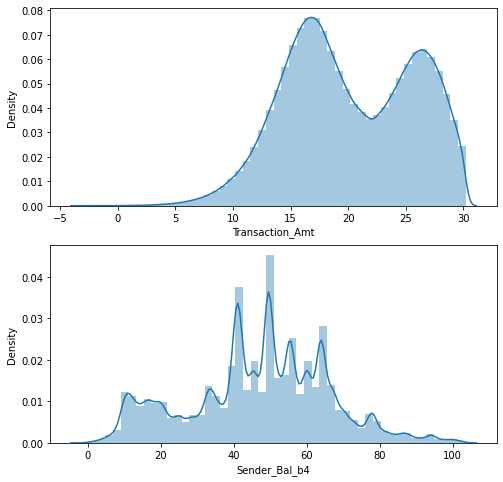

In [117]:
# Boxcox transformation 
df = df[(df['Transaction_Amt'] > 0)]
df = df[(df['Sender_Bal_b4'] > 0)]
df.Transaction_Amt = boxcox(df.Transaction_Amt)[0]
df.Sender_Bal_b4 = boxcox(df.Sender_Bal_b4)[0]
plt.figure(figsize = (8, 8))

# Plotting features after transformation
plt.subplot(2,1,1)
sns.distplot(df['Transaction_Amt'])
plt.subplot(2,1,2)
sns.distplot(df['Sender_Bal_b4'])
plt.show()

Skewness in the distribution removed after transformation

##### **Handling Multicollinearity issue**

* Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables
* Multicollinearity is a problem because it undermines the statistical significance of an independent variable

* Remove highly correlated predictors from the model. If you have two or more factors with a high VIF, remove one from the model

* Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components



In [118]:
df.corr()

,Transaction_Hours,Transaction_Amt,Sender_Bal_b4,Sender_Bal_After,Receiver_Bal_b4,Receiver_Bal_After,isFraud,isFlaggedFraud
Transaction_Hours,1.000000,-0.001161,-0.005689,-0.005657,-0.001804,-0.016909,0.013963,NaN
Transaction_Amt,-0.001161,1.000000,0.165902,-0.434338,0.319265,0.608552,0.015790,NaN
Sender_Bal_b4,-0.005689,0.165902,1.000000,0.387755,0.072997,0.123488,0.049417,NaN
Sender_Bal_After,-0.005657,-0.434338,0.387755,1.000000,-0.125340,-0.256466,-0.021507,NaN
Receiver_Bal_b4,-0.001804,0.319265,0.072997,-0.125340,1.000000,0.899204,-0.002143,NaN
Receiver_Bal_After,-0.016909,0.608552,0.123488,-0.256466,0.899204,1.000000,-0.006374,NaN
isFraud,0.013963,0.015790,0.049417,-0.021507,-0.002143,-0.006374,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Feature Selection**


**Transaction_Hours** - This feature holds the unit of transaction time which is an important feature to predict the fraudulent transaction. Irregular time window can help us to detect the fraud.

**Transaction_Amt** - Without amount details it is difficult to track transaction amoung big pile of transactions, amount helps to search and find the transaction entity.

**Sender_Bal_b4, Sender_Bal_After, Receiver_Bal_b4, Receicer_Bal_After** - They are all correlated to each other, Having any one feature is sufficient for model building.

**isFlaggedFraud** - This feature has extreme imbalanced values which will not help in prediction, Hence we can remove it.

In [119]:
# Dropping features to remove multicollinearity issue
df.drop(columns = ['Sender_Bal_After', 'Receiver_Bal_b4', 'Sender','Receiver_Bal_After', 'isFlaggedFraud', 'Receiver'], inplace = True)

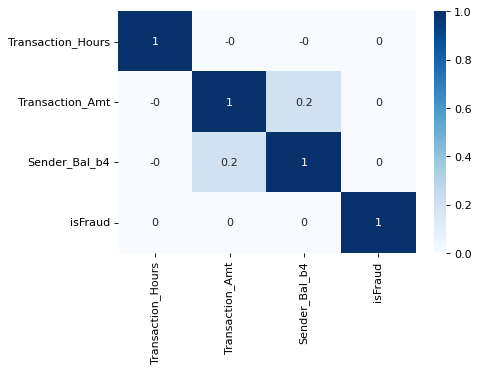

In [120]:
# Correlation after removing unecessary features
plt.figure(dpi=80)
sns.heatmap(np.round(df.corr(),1),annot=True, cmap="Blues")
plt.show()

As you can see the correlation among features and target are less than 0.2, all high correlated features are removed 

##### **Handling categorical data**

In [121]:
# Converting categorical data into numerical form 
le = LabelEncoder()
df['Transaction_Type'] = le.fit_transform(df['Type'])

In [122]:
df.drop(columns = ['Type'], inplace = True)

##### **Resampling Imbalanced dataset**

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes

Having a balanced data set for a model would generate higher accuracy models, higher balanced accuracy and balanced detection rate. Hence, its important to have a balanced data set for a classification models

To handle the imbalanced data, Sampling techniques are used. There are two types of sampling techniques available: Undersampling and Oversampling. Undersampling selects same quantity of the instances from the majority class thus equally with minority class.

Since our dataset is huge we perform undersampling to avoid heavy computation issues. Be aware that undersampling might miss important factors required for predicting the output. So train the model with different subsets to compare any drastic difference in performance.

In [123]:
# sampling ration is 1, means equal share of classes 
sampler = RandomUnderSampler(sampling_strategy = 1, random_state = 1)

In [124]:
x = df.drop(columns = ['isFraud'])
y = df.isFraud

In [125]:
# Undersampled input datasets
resampled_x, resampled_y = sampler.fit_resample(x, y)

In [126]:
df.isFraud.value_counts()

0    1779993
1       2432
Name: isFraud, dtype: int64

In [127]:
resampled_y.value_counts()

0    2432
1    2432
Name: isFraud, dtype: int64

### **Model Building**

In [128]:
# Spliting dataset in training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(resampled_x, resampled_y, random_state = 1, train_size = 0.7)

In [129]:
ytrain.shape, ytest.shape

((3404,), (1460,))

##### **Pipeline Implementation**

In [130]:
# Creating pipelines for classification algorithms with custom parameters

pipeline_lr = Pipeline([('model', LogisticRegression(max_iter=5000))])
pipeline_svc = Pipeline([('svc_model', SVC(kernel = 'rbf', gamma = 0.01))])
pipeline_dc = Pipeline([('dc_model', DecisionTreeClassifier(max_depth=20, random_state=1))])
pipeline_rf = Pipeline([('rf_model', RandomForestClassifier(n_estimators = 200, max_depth=10, random_state=1))])
pipeline_nb = Pipeline([('guass_model', GaussianNB())])
pipeline_xg = Pipeline([('xgboost', XGBClassifier(min_child_weight=2, max_depth = 10, max_leaf_nodes = 8))])

# Dictionary with algorithm and pipeline name

models = {
    'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb,
    'XGBoost' : pipeline_xg
}



In [131]:
# Function to train each model and predict ytest to calculate performance and accuracy

def model_prediction(name, model):
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(ytest, ypred)
        accuracy = accuracy_score(ytest, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy is: {accuracy:.2f}")
        print(f"Precision is: {precision:.2f}")
        print(f"Recall is: {recall:.2f}")
        print(f"Fscore is: {f_beta:.2f}")
        print(f"AUC is: {auc:.2f}\n")

In [132]:
# Calling the function 
for name, model in models.items():
  model_prediction(name, model)

Model name : logistic_regression
Accuracy is: 0.73
Precision is: 0.73
Recall is: 0.73
Fscore is: 0.73
AUC is: 0.73

Model name : SVM
Accuracy is: 0.85
Precision is: 0.85
Recall is: 0.85
Fscore is: 0.85
AUC is: 0.85

Model name : Decision Tree
Accuracy is: 0.96
Precision is: 0.96
Recall is: 0.96
Fscore is: 0.96
AUC is: 0.96

Model name : Random Forest
Accuracy is: 0.97
Precision is: 0.97
Recall is: 0.97
Fscore is: 0.96
AUC is: 0.96

Model name : Naive Bayes
Accuracy is: 0.79
Precision is: 0.79
Recall is: 0.79
Fscore is: 0.79
AUC is: 0.79

Model name : XGBoost
Accuracy is: 0.96
Precision is: 0.97
Recall is: 0.96
Fscore is: 0.96
AUC is: 0.96



In [133]:
df.head()

,Transaction_Hours,Transaction_Amt,Sender_Bal_b4,isFraud,Transaction_Type
1,1,11.885440,49.819258,0,3
2,1,7.078023,11.261377,1,4
3,1,7.078023,11.261377,1,1
4,1,16.666040,60.323528,0,3
5,1,15.535850,64.918034,0,3


#### Testing

In [134]:
def testing(name, model):
  print(f'{name} prediction for actual output [0] is : ', model.predict([[1, 15, 50, 3]]))
  print(f'{name} prediction for actual output [1] is : ', model.predict([[1, 7, 11, 4]]))

modelss = {
    'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb
}


In [135]:
# Calling the function 
for name, model in modelss.items():
  testing(name, model)

logistic_regression prediction for actual output [0] is :  [0]
logistic_regression prediction for actual output [1] is :  [0]
SVM prediction for actual output [0] is :  [1]
SVM prediction for actual output [1] is :  [1]
Decision Tree prediction for actual output [0] is :  [0]
Decision Tree prediction for actual output [1] is :  [1]
Random Forest prediction for actual output [0] is :  [0]
Random Forest prediction for actual output [1] is :  [1]
Naive Bayes prediction for actual output [0] is :  [0]
Naive Bayes prediction for actual output [1] is :  [0]


##### **Best Model**

Decision Tree and Random Forest performs best with prediction accuracy 97 and recall accuracy 97 which is important for our problem statement where false negative is our priority

#### **Prevention**



*  Transaction History and Frequency - if unaccounted transactions occurs frequently we should confirm genuinity of the transaction with the customer
*  Repeated wrong PIN or Password - We should halt the transaction and alert the customer immediately.
*  Make customers to change PIN or password often
*  Instruct user to use own mobile or computers while doing transactions to avoid phishing attacks
*  Increased cybersecurity for banking websites and mobile applications
*  Two factor authentication for transaction  
